In [63]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from itertools import combinations

pd.set_option('display.max_rows', 500)



In [64]:
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')
data = pd.concat([train_df, test_df])

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      129880 non

In [66]:
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [67]:
data = data.drop(data.iloc[:, [0,1]], axis=1)

In [68]:
data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [69]:
data = data.dropna()

Chi Squared checks if two categorical variables are related or independent. 

In [70]:
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class'] + data.columns[6:20].tolist()
data[categorical_cols] = data[categorical_cols].astype('category')


In [71]:
def plot_critical_region(chi2, critical_value, dof):
    x = np.linspace(0, chi2+ 10, 1000)
    y = stats.chi2.pdf(x, dof)

    plt.plot(x, y, label='Chi-squared Distribution', color='blue')
    plt.fill_between(x, y, where=(x >= critical_value), color='red', alpha=0.5, label='Critical Region')
    plt.axvline(x=chi2, color='green', linestyle='dashed', label='Chi-squared Statistic')
    plt.axvline(x=critical_value, color='red', linestyle='dashed', label='Critical Value')

    plt.title('Chi-squared Distribution with Critical Region')
    plt.xlabel('Chi-squared Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

Contingency Table: 
 Ease of Online booking     0      1      2      3      4     5
Gender                                                        
Female                  2884  11117  15377  15357  12209  8759
Male                    2782  10691  14606  14940  12153  8612

Expected Frequencies: 
 [[ 2874.9851182  11065.597504   15213.67433796 15373.00108119
  12361.52267023  8814.21928842]
 [ 2791.0148818  10742.402496   14769.32566204 14923.99891881
  12000.47732977  8556.78071158]]

Chi-squared value: 8.658140350907585
P-value: 0.12350161056086816
Degrees of freedom: 5
The values are independent (there is no association between them).


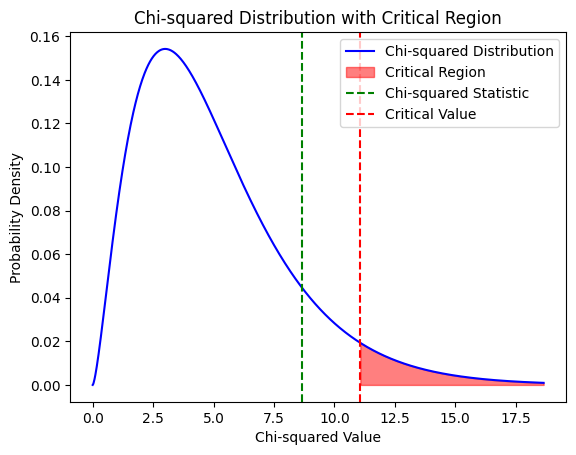

In [77]:
alpha = 0.05
cat_cols = data.select_dtypes(include=['category']).columns
categorical_df = data[cat_cols].copy()

contingency_table = pd.crosstab(categorical_df["Gender"], categorical_df["Ease of Online booking"])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:", "\n", contingency_table)
print("\nExpected Frequencies:", "\n", expected)

print(f"\nChi-squared value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
if p < alpha:
    print("We reject the null hypothesis. The values are dependent (there is an association between them).")
else:
    print("The values are independent (there is no association between them).")

critical_value = stats.chi2.ppf(1 - alpha, dof)
plot_critical_region(chi2, critical_value, dof)


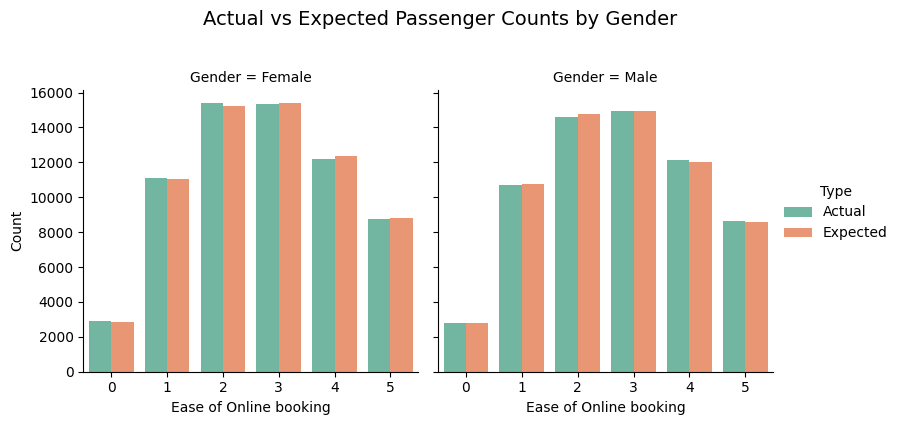

In [73]:
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
expected_df.index.name = contingency_table.index.name
expected_df.columns.name = contingency_table.columns.name

actual_long = (contingency_table.reset_index().melt(id_vars="Gender", var_name="Ease of Online booking", value_name='Count')
    .assign(Type='Actual')
)
expected_long = (expected_df.reset_index().melt(id_vars="Gender", var_name="Ease of Online booking", value_name='Count')
    .assign(Type='Expected')
)
plot_df = pd.concat([actual_long, expected_long], ignore_index=True)

g = sns.catplot(data=plot_df,kind='bar',x="Ease of Online booking",y='Count',hue='Type', col="Gender",palette='Set2',height=4,aspect=1)

g.fig.suptitle('Actual vs Expected Passenger Counts by Gender', y=1.05, fontsize=14)
g.fig.subplots_adjust(top=0.85)



Null Hypothesis (H0): There is no relationship between the variables
Alternative Hypothesis (H1): There is a relationship between variables

In [74]:
def chi_squared_test(df, col_x, col_y, alpha=0.05):
    contingency = pd.crosstab(df[col_x], df[col_y])
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    hypothesis = 'dependent' if p_value < alpha else 'independent'
    return {
        'feature_1': col_x,
        'feature_2': col_y,
        'chi2': chi2,
        'p_value': p_value,
        'dof': dof,
        'Hypothesis': hypothesis
    }

def chi_squared_df(df, alpha=0.05):    
    categorical_cols = df.select_dtypes(include=['category']).columns.tolist()
    chi2_results = []

    for col_x, col_y in combinations(categorical_cols, 2):
        chi2_results.append(chi_squared_test(df, col_x, col_y, alpha))

    chi2_results_df = pd.DataFrame(chi2_results).reset_index(drop=True)
    independent_pairs_df = chi2_results_df[chi2_results_df['Hypothesis'] == 'independent'].reset_index(drop=True)
    return independent_pairs_df


In [75]:
independent_df = chi_squared_df(data)
independent_df

,feature_1,feature_2,chi2,p_value,dof,Hypothesis
0,Gender,Inflight wifi service,6.922133,0.226496,5,independent
1,Gender,Ease of Online booking,8.658140,0.123502,5,independent
2,Gender,Inflight entertainment,4.247379,0.514377,5,independent
